# Gaussian Process Distribution of Relaxation Times. 

## In this tutorial we will show use the GP-DRT method to analyze actual experimental data

The impedance data in the csv file named `EIS_experiment.csv`. The file has three columns. The first column is the frequency, the second one the real part of the impedance. The third column is the imaginary part of impedance. To use this tutorial for your own data, we recommend the frequencies go are sorted ascendingly.

In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import scipy as scipy

from math import sin, cos, pi
import GP_DRT
from scipy.optimize import minimize
import pandas as pd
%matplotlib inline

## 1) Read in the impedance data from the csv file
### IMPORTANT: frequencies should be sorted ascendingly (low to high)

In [279]:
# Convert biologic EIS files into form suitable for code

data = 'nC3rdbatch-LFP-475um-nC_44-8mg-EMC70-EC30-2VC-0C-cycle1.csv'

df = pd.read_csv(data, header=None, encoding= 'unicode_escape')

df.rename(columns={0: 'freq', 1: 'Z_real', 2: 'Z_imag'}, inplace=True)

df.sort_values(by=['freq'], inplace=True, ascending=True)

df.to_csv("EIS_experiment.csv", index = False)


In [280]:
Z_data = pd.read_csv('EIS_experiment.csv')
freq_vec, Z_exp = Z_data['freq'].values, Z_data['Z_real'].values+1j*Z_data['Z_imag'].values

# define the frequency range
N_freqs = len(freq_vec)
xi_vec = np.log(freq_vec)
tau  = 1/freq_vec

# define the frequency range used for prediction, we choose a wider range to better display the DRT
freq_vec_star = np.logspace(-4., 6., num=101, endpoint=True)
xi_vec_star = np.log(freq_vec_star)

# finer mesh for plotting only
freq_vec_plot  = np.logspace(-4., 6., num=1001, endpoint=True)

NameError: name 'move' is not defined

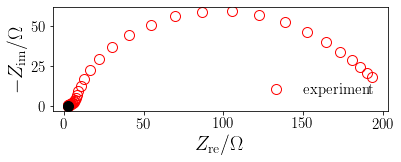

In [281]:
#Plot Nyquist plot

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Nyquist plot of the EIS spectrum
plt.plot(np.real(Z_exp), -np.imag(Z_exp), "o", markersize=10, fillstyle='none', color="red", label="experiment")
plt.plot(np.real(Z_exp[40:80:10]), -np.imag(Z_exp[40:80:10]), 'o', markersize=10, color="black")

plt.legend(frameon=False, fontsize = 15)
plt.axis('scaled')

# this depends on the data used - if you wish to use your own data you may need to modify this
#plt.xlim(1.42, 1.52)
#plt.ylim(-0.001, 0.051)
#plt.xticks(np.arange(1.42, 1.521, 0.02))
#plt.yticks(np.arange(0.00, 0.051, 0.01))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$Z_{\rm re}/\Omega$', fontsize = 20)
plt.ylabel(r'$-Z_{\rm im}/\Omega$', fontsize = 20)

# label the frequencies - if you wish to use your own data you may need to modify this
label_index = range(40,80,10)
#move = [[-0.005, 0.008], [-0.005, 0.008], [-0.005, 0.008], [-0.005, 0.01]]
for k, ind in enumerate(label_index):
    power = int(np.log10(freq_vec[ind]))
    num = freq_vec[ind]/(10**(power))
    plt.annotate(r'${0:.1f}\times 10^{1}$'.format(num, power), xy=(np.real(Z_exp[ind]), -np.imag(Z_exp[ind])), 
                 xytext=(np.real(Z_exp[ind])+move[k][0], move[k][1]-np.imag(Z_exp[ind])), 
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc"))
plt.show()

In [282]:
# initial parameters parameter to maximize the marginal log-likelihood as shown in eq (31)
sigma_n = 0.003   #3.0E-4
sigma_f = 0.006      #6.0E-3
ell = 1          #2

theta_0 = np.array([sigma_n, sigma_f, ell])
seq_theta = np.copy(theta_0)
def print_results(theta):
    global seq_theta
    seq_theta = np.vstack((seq_theta, theta))
    print('{0:.7f}  {1:.7f}  {2:.7f}'.format(theta[0], theta[1], theta[2]))
    
print('sigma_n,   sigma_f,   ell')

# minimize the NMLL $L(\theta)$ w.r.t sigma_n, sigma_f, ell using the BFGS method as implemented in scipy
res = minimize(GP_DRT.NMLL_fct, theta_0, args=(Z_exp, xi_vec), method='Nelder-Mead', \
               callback=print_results, options={'disp': True})

theta_0 = res.x
res = minimize(GP_DRT.NMLL_fct, theta_0, args=(Z_exp, xi_vec), method='BFGS', \
               jac=GP_DRT.grad_NMLL_fct,  callback=print_results, options={'disp': True})

# collect the optimized parameters
sigma_n, sigma_f, ell = res.x

sigma_n,   sigma_f,   ell
0.0030000  0.0063000  1.0000000
0.0028000  0.0065000  1.0833333
0.0029000  0.0070000  1.0166667
0.0025000  0.0074000  1.0333333
0.0022000  0.0083000  1.1333333
0.0020000  0.0097000  1.0166667
0.0009000  0.0114000  1.1500000
0.0009000  0.0122000  1.1666667
0.0009000  0.0122000  1.1666667
0.0009000  0.0122000  1.1666667
0.0009000  0.0122000  1.1666667
0.0009000  0.0122000  1.1666667
0.0004288  0.0128630  1.1961591
0.0004406  0.0133049  1.2368084
0.0004052  0.0143790  1.1648605
0.0004052  0.0143790  1.1648605
0.0006506  0.0148158  1.1923221
0.0006506  0.0148158  1.1923221
0.0007553  0.0160972  1.0740499
0.0007553  0.0160972  1.0740499
0.0011638  0.0191264  1.0251139
0.0011638  0.0191264  1.0251139
0.0013223  0.0235731  0.7866707
0.0022171  0.0293303  0.6306120
0.0022201  0.0343796  0.5085419
0.0022201  0.0343796  0.5085419
0.0022201  0.0343796  0.5085419
0.0022201  0.0343796  0.5085419
0.0025479  0.0326608  0.6398625
0.0025479  0.0326608  0.6398625
0.0028634  0.0

In [283]:
# calculate the matrices shown in eq (18)
K = GP_DRT.matrix_K(xi_vec, xi_vec, sigma_f, ell)
L_im_K = GP_DRT.matrix_L_im_K(xi_vec, xi_vec, sigma_f, ell)
L2_im_K = GP_DRT.matrix_L2_im_K(xi_vec, xi_vec, sigma_f, ell)
Sigma = (sigma_n**2)*np.eye(N_freqs)

In [284]:
# the matrix $\mathcal L^2_{\rm im} \mathbf K + \sigma_n^2 \mathbf I$ whose inverse is needed
K_im_full = L2_im_K + Sigma

# check if the K_im_full is positive definite, otherwise, a nearest one would replace the K_im_full
if not GP_DRT.is_PD(K_im_full):
    K_im_full = GP_DRT.nearest_PD(K_im_full)

# Cholesky factorization, L is a lower-triangular matrix
L = np.linalg.cholesky(K_im_full)

# solve for alpha
alpha = np.linalg.solve(L, Z_exp.imag)
alpha = np.linalg.solve(L.T, alpha)

# estimate the gamma of eq (21a)
gamma_fct_est = np.dot(L_im_K, alpha)

# covariance matrix
inv_L = np.linalg.inv(L)
inv_K_im_full = np.dot(inv_L.T, inv_L)

# estimate the sigma of gamma for eq (21b)
cov_gamma_fct_est = K - np.dot(L_im_K, np.dot(inv_K_im_full, L_im_K.T))
sigma_gamma_fct_est = np.sqrt(np.diag(cov_gamma_fct_est))

C:\Users\SUNYHI~1\AppData\Local\Temp/ipykernel_15804/1486510542.py:24: RuntimeWarning: invalid value encountered in sqrt
  sigma_gamma_fct_est = np.sqrt(np.diag(cov_gamma_fct_est))


In [285]:
# initialize the imaginary part of impedance vector
Z_im_vec_star = np.empty_like(xi_vec_star)
Sigma_Z_im_vec_star = np.empty_like(xi_vec_star)

gamma_vec_star = np.empty_like(xi_vec_star)
Sigma_gamma_vec_star = np.empty_like(xi_vec_star)

# calculate the imaginary part of impedance at each $\xi$ point for the plot
for index, val in enumerate(xi_vec_star):
    xi_star = np.array([val])

    # compute matrices shown in eq (18), xi_star corresponds to a new point
    k_star = GP_DRT.matrix_K(xi_vec, xi_star, sigma_f, ell)
    L_im_k_star_up = GP_DRT.matrix_L_im_K(xi_star, xi_vec, sigma_f, ell)
    L2_im_k_star = GP_DRT.matrix_L2_im_K(xi_vec, xi_star, sigma_f, ell)
    k_star_star = GP_DRT.matrix_K(xi_star, xi_star, sigma_f, ell)
    L_im_k_star_star = GP_DRT.matrix_L_im_K(xi_star, xi_star, sigma_f, ell)
    L2_im_k_star_star = GP_DRT.matrix_L2_im_K(xi_star, xi_star, sigma_f, ell)

    # compute Z_im_star mean and standard deviation using eq (26)
    Z_im_vec_star[index] = np.dot(L2_im_k_star.T, np.dot(inv_K_im_full, Z_exp.imag))
    Sigma_Z_im_vec_star[index] = L2_im_k_star_star - np.dot(L2_im_k_star.T, np.dot(inv_K_im_full, L2_im_k_star))
    
    # compute gamma_star mean and standard deviation using eq (29)
    gamma_vec_star[index] = np.dot(L_im_k_star_up, np.dot(inv_K_im_full, Z_exp.imag))
    Sigma_gamma_vec_star[index] = k_star_star - np.dot(L_im_k_star_up, np.dot(inv_K_im_full, L_im_k_star_up.T))

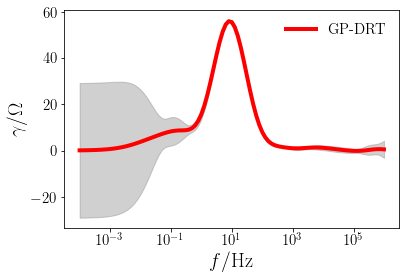

In [286]:
# plot the DRT and its confidence region
plt.semilogx(freq_vec_star, gamma_vec_star, linewidth=4, color="red", label="GP-DRT")
plt.fill_between(freq_vec_star, gamma_vec_star-3*np.sqrt(abs(Sigma_gamma_vec_star)), gamma_vec_star+3*np.sqrt(abs(Sigma_gamma_vec_star)), color="0.4", alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#plt.axis([1E-4,1E6,-0.01,0.025])
#plt.yticks(np.arange(-0.01, 0.025, 0.01))
plt.legend(frameon=False, fontsize = 15)
plt.xlabel(r'$f/{\rm Hz}$', fontsize = 20)
plt.ylabel(r'$\gamma/\Omega$', fontsize = 20)
plt.show()

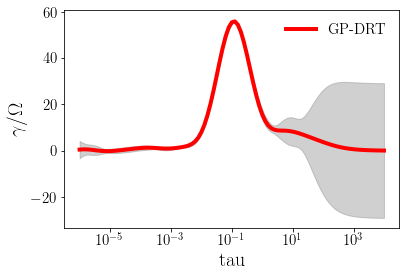

In [287]:
# plot the DRT and its confidence region
plt.semilogx((1/(freq_vec_star)), gamma_vec_star, linewidth=4, color="red", label="GP-DRT")
plt.fill_between((1/(freq_vec_star)), gamma_vec_star-3*np.sqrt(abs(Sigma_gamma_vec_star)), gamma_vec_star+3*np.sqrt(abs(Sigma_gamma_vec_star)), color="0.4", alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#plt.axis([1E-4,1E6,-0.01,0.025])
#plt.yticks(np.arange(-0.01, 0.025, 0.01))
plt.legend(frameon=False, fontsize = 15)
plt.xlabel('tau', fontsize = 20)
plt.ylabel(r'$\gamma/\Omega$', fontsize = 20)
plt.show()

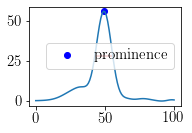

In [250]:
#Find peak tops

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_widths

x = gamma_vec_star
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=0.5)      # BEST!
results_full = peak_widths(x, peaks2, rel_height=0.5)

#plt.subplot(2, 2, 1)
#plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.hlines(*results_full[1:], color="C3")



In [251]:
#Fit peaks

from lmfit.models import GaussianModel
amp1 = 1
cen1 = 1
sigma1 = 0.05

#df=pd.DataFrame(index=np.linspace(0,10,num=1000),columns=['int'])

#x is frequency in Hz, no 2pi factor here.
x = np.log10((1/freq_vec_star))
y = gamma_vec_star

print(x[peaks2[0]])
print(x[peaks2[1]])
print(x[peaks2[2]])

logpeak1 = x[peaks2[0]]
logpeak2 = x[peaks2[1]]
logpeak3 = x[peaks2[2]]
#logpeak2 = x[peaks2[1]]
#logpeak3 = x[peaks2[2]]
#logpeak4 = logpeak3 + 0.5

def _ngaussian(x, amps,cens,sigmas):
    fn = 0
    if len(amps)== len(cens)== len(sigmas):
        for i in range(len(amps)):
            fn = fn+amps[i]*(1/(sigmas[i]*(np.sqrt(2*np.pi))))*\
            (np.exp((-1.0/2.0)*(((x-cens[i])/sigmas[i])**2)))
            fn = fn+np.random.normal(size=len(x), scale=0.05)
    else:
        print('Your inputs have unequal lengths')
    return fn

amps = [1.30, 1, 1]#, 0.92, 2.11, 1]
cens = [logpeak1, logpeak2, logpeak3]#, logpeak2, logpeak3, logpeak4]
sigmas=[0.05, 0.05, 0.05]#, 0.09, 0.07, 0.1]

popt_peaks = [amps,cens,sigmas]
y1 = _ngaussian(x, *popt_peaks)

# create a model with 3 Gaussians: pretty easy to generalize
# to a loop to make N peaks
model = (GaussianModel(prefix='p1_') +
        GaussianModel(prefix='p2_') +
         GaussianModel(prefix='p3_')) 
#        GaussianModel(prefix='p4_') )

# create Parameters (named from function arguments). For
# Gaussian, Lorentzian, Voigt, etc these are "center", "amplitude", "sigma"
params = model.make_params(p1_center=logpeak1, p1_amplitude=8, p1_sigma=1,
                           p2_center=logpeak2, p2_amplitude=8, p2_sigma=1,
                           p3_center=logpeak3, p3_amplitude=8, p3_sigma=1)
#                           p4_center=logpeak4, p4_amplitude=8, p4_sigma=1)

# Parameters can have min/max bounds, be fixed (`.vary = False`)
# or constrained to a mathematical expression of other Parameter values
#params['p1_center'].vary = False
params['p1_amplitude'].min = 0
params['p1_sigma'].max = 0.7

#params['p2_center'].vary = False
params['p2_amplitude'].min = 0
params['p2_sigma'].max = 0.6

#params['p3_center'].vary = False
params['p3_amplitude'].min = 0
params['p3_sigma'].max = 0.5

#params['p4_center'].vary = False

# run the fit
result = model.fit(y, params, x=x)

# print out the fit results
#print(result.fit_report())
components = result.eval_components(x=x)

# plot results
plt.scatter(x, y, color = 'black', label='data')
plt.plot(x, result.best_fit, '-', color = 'red', linewidth='4', label='GP-fit')

plt.plot(x, components['p1_'], '--')
plt.plot(x, components['p2_'], '--')
plt.plot(x, components['p3_'], '--')
#plt.plot(x, components['p4_'], '--')

plt.xlabel('tau', fontsize = 20)
plt.ylabel(r'$\gamma/\Omega$', fontsize = 20)



plt.legend()
#plt.xscale('log')
plt.show()

-0.9000000000000004


IndexError: index 1 is out of bounds for axis 0 with size 1

In [239]:
#Find peak areas and also Zre

#print(result.params['p1_amplitude'].value)
#print(result.fit_report())

#_ngaussian(x, result.params['p1_amplitude'].value,result.params['p1_center'].value,result.params['p1_sigma'].value)

#x2 is tau
x2 = np.log10((1/(freq_vec_star)))


#working in tau
minx= x2.min()
maxx=x2.max()

#print(minx)
#print(maxx)

df2 = pd.DataFrame()

#log tau
xseries = np.linspace(minx, maxx, 1000)
df2['xseries'] = xseries
df2['xseries_tau'] = np.power(10, (xseries))

#Note that formally the frequency is given is freq*2pi
#frequency in s-1
df2['xseries_freq'] = (1/df2['xseries_tau'])/(2*np.pi)
#frequency in radian s-1
df2['xseries_freq1'] = np.power(10, (1/xseries))
df2['xseries_time1'] = np.power(10, xseries) 


#model Gaussian function fitted from above

gaussian1 = result.params['p1_height'].value*np.exp(-(df2.xseries-result.params['p1_center'].value)**2/(2*result.params['p1_sigma'].value**2))
gaussian2 = result.params['p2_height'].value*np.exp(-(df2.xseries-result.params['p2_center'].value)**2/(2*result.params['p2_sigma'].value**2))
gaussian3 = result.params['p3_height'].value*np.exp(-(df2.xseries-result.params['p3_center'].value)**2/(2*result.params['p3_sigma'].value**2))
#gaussian4 = result.params['p4_height'].value*np.exp(-(df2.xseries-result.params['p4_center'].value)**2/(2*result.params['p4_sigma'].value**2))


df2['g1'] = gaussian1
df2['g2'] = gaussian2
df2['g3'] = gaussian3
#df2['g4'] = gaussian4

p1_peakheight1 = df2['g1'].max()
p2_peakheight1 = df2['g2'].max()
p3_peakheight1 = df2['g3'].max()
#p4_peakheight1 = df2['g4'].max()

max_freq_p1x = df2['xseries'].loc[df2['g1'] == p1_peakheight1]
max_freq_p1ax = max_freq_p1x.values[0]
max_freq_p2x = df2['xseries'].loc[df2['g2'] == p2_peakheight1]
max_freq_p2ax = max_freq_p2x.values[0]
max_freq_p3x = df2['xseries'].loc[df2['g3'] == p3_peakheight1]
max_freq_p3ax = max_freq_p3x.values[0]
#max_freq_p4x = df2['xseries'].loc[df2['g4'] == p4_peakheight1]
#max_freq_p4ax = max_freq_p4x.values[0]

#Multiply Gaussian by fraction in eq. 11a 10.1016/j.electacta.2019.135316 - for the purpose of integrating to get Zre

df2['g1i'] = df2['g1']*(1/(1+(2*np.pi*df2['xseries_time1']*df2['xseries_freq1'])**2))*2.3026
df2['g2i'] = df2['g2']*(1/(1+(2*np.pi*df2['xseries_time1']*df2['xseries_freq1'])**2))*2.3026
df2['g3i'] = df2['g3']*(1/(1+(2*np.pi*df2['xseries_time1']*df2['xseries_freq1'])**2))*2.3026
#df2['g4i'] = df2['g4']*(1/(1+(2*np.pi)**2))


#Integrate using trapezium rule

df2['g1a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g1i']+df2['g1i'].shift(-1))/2)
df2['g2a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g2i']+df2['g2i'].shift(-1))/2)
df2['g3a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g3i']+df2['g3i'].shift(-1))/2)
#df2['g4a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g4i']+df2['g4i'].shift(-1))/2)

Zre_g1 = df2['g1a'].sum()
Zre_g2 = df2['g2a'].sum()
Zre_g3 = df2['g3a'].sum()
#Zre_g4 = df2['g4a'].sum()

#Find corresponding frequency for the peak

p1_peakheight = df2['g1i'].max()
p2_peakheight = df2['g2i'].max()
p3_peakheight = df2['g3i'].max()
#p4_peakheight = df2['g4i'].max()


max_freq_p1 = df2['xseries_freq'].loc[df2['g1i'] == p1_peakheight]
max_freq_p1a = max_freq_p1.values[0]
max_freq_p2 = df2['xseries_freq'].loc[df2['g2i'] == p2_peakheight]
max_freq_p2a = max_freq_p2.values[0]
max_freq_p3 = df2['xseries_freq'].loc[df2['g3i'] == p3_peakheight]
max_freq_p3a = max_freq_p3.values[0]
#max_freq_p4 = df2['xseries'].loc[df2['g4i'] == p4_peakheight]
#max_freq_p4a = max_freq_p4.values[0]

tau1 = df2['xseries_tau'].loc[df2['g1i'] == p1_peakheight]
tau2 = df2['xseries_tau'].loc[df2['g2i'] == p2_peakheight]
tau3 = df2['xseries_tau'].loc[df2['g3i'] == p3_peakheight]
logtau1 = df2['xseries'].loc[df2['g1i'] == p1_peakheight]
logtau2 = df2['xseries'].loc[df2['g2i'] == p2_peakheight]
logtau3 = df2['xseries'].loc[df2['g3i'] == p3_peakheight] 
                              
df3 = pd.DataFrame()
df3['tau / s'] =  [tau1.values[0], tau2.values[0], tau3.values[0]]
df3['log tau'] =  [logtau1.values[0], logtau2.values[0], logtau3.values[0]] 
df3['freq'] = [max_freq_p1a, max_freq_p2a, max_freq_p3a]#, (np.power(10, (max_freq_p2a)))/(2*np.pi)]#, np.power(10, max_freq_p3a), np.power(10, max_freq_p4a)]
df3['Zre'] = [Zre_g1, Zre_g2, Zre_g3]#,Zre_g2]#,Zre_g3,Zre_g4]
df3['log freq'] = [np.log10(max_freq_p1a), np.log10(max_freq_p2a), np.log10(max_freq_p3a)] #, max_freq_p2a]#, max_freq_p3a, max_freq_p4a]
df3['Peak height'] = [p1_peakheight1, p2_peakheight1, p3_peakheight1]#, p3_peakheight1, p4_peakheight1]
#df3['log freq1'] = [max_freq_p1ax, max_freq_p2ax, max_freq_p3ax, max_freq_p4ax]
#df3['freq_1'] = [np.power(10, max_freq_p1ax), np.power(10, max_freq_p2ax), np.power(10, max_freq_p3ax), np.power(10, max_freq_p4ax)]
df3.sort_values(by=['freq'], inplace=True, ascending=False)

df3


,tau / s,log tau,freq,Zre,log freq,Peak height
2,0.000118,-3.927928,1348.180557,2.495558,3.129748,1.303543
1,0.001711,-2.766767,93.022263,3.947676,1.968587,2.079420
0,0.412682,-0.384384,0.385660,1.251231,-0.413795,0.497033


### 4e) Plot the imaginary part of the GP-DRT impedance together with the experimental one

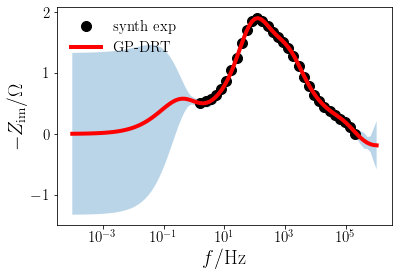

In [240]:
plt.semilogx(freq_vec, -Z_exp.imag, "o", markersize=10, color="black", label="synth exp")
plt.semilogx(freq_vec_star, -Z_im_vec_star, linewidth=4, color="red", label="GP-DRT")
plt.fill_between(freq_vec_star, -Z_im_vec_star-3*np.sqrt(abs(Sigma_Z_im_vec_star)), -Z_im_vec_star+\
                 3*np.sqrt(abs(Sigma_Z_im_vec_star)), alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#plt.axis([1E-3,1E5,-0.01,0.03])
plt.legend(frameon=False, fontsize = 15)
plt.xlabel(r'$f/{\rm Hz}$', fontsize = 20)
plt.ylabel(r'$-Z_{\rm im}/\Omega$', fontsize = 20)
plt.show()